In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot

#from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
#import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**SPLITTING DATA INTO TRAINING AND VALIDATION**

In [ ]:
traindir = "/content/drive/MyDrive/autistic/train"
validdir = "/content/drive/MyDrive/autistic/valid"
testdir = "/content/drive/MyDrive/autistic/test"

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 40

training_set = train_datagen.flow_from_directory(traindir, target_size=(150, 150), batch_size=batch_size, class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(validdir, target_size=(150, 150), batch_size=batch_size, class_mode='categorical')

test_set = test_datagen.flow_from_directory(testdir, target_size=(150, 150), batch_size=batch_size, class_mode= None)

Found 440 images belonging to 4 classes.
Found 139 images belonging to 4 classes.
Found 250 images belonging to 4 classes.


In [ ]:
class_dict = training_set.class_indices

print(class_dict)

{'angry': 0, 'fear': 1, 'neutral': 2, 'sad': 3}


In [ ]:
cls_dict = valid_set.class_indices
print(cls_dict)

{'angry': 0, 'fear': 1, 'neutral': 2, 'sad': 3}


In [ ]:
li = list(class_dict.keys())
print(li)

['angry', 'fear', 'neutral', 'sad']


In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples

history = model.fit(
      training_set,
      steps_per_epoch=train_num//batch_size,  # 2000 images = batch_size * steps
      epochs=3,
      validation_data=valid_set,
      validation_steps=valid_num//batch_size) # 1000 images = batch_size * steps

In [ ]:
print(tf.__version__)

2.5.0


# VGG16 Model

**INITIALIZING THE BASE MODEL: VGG16**

In [ ]:
base_model=VGG16(include_top=False, weights="imagenet", input_shape=(150,150,3))
base_model.trainable=False

**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(4,activation='softmax'))
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 32772     
Total params: 14,747,460
Trainable params: 32,772
Non-trainable params: 14,714,688
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=40, validation_steps=valid_num//batch_size)

Epoch 1/40
11/11 [==============================] - 5s 378ms/step - loss: 1.4625 - accuracy: 0.3814 - val_loss: 1.3237 - val_accuracy: 0.4583
Epoch 2/40
11/11 [==============================] - 3s 327ms/step - loss: 1.1288 - accuracy: 0.4738 - val_loss: 1.0667 - val_accuracy: 0.5583
Epoch 3/40
11/11 [==============================] - 3s 334ms/step - loss: 1.0578 - accuracy: 0.5181 - val_loss: 1.0961 - val_accuracy: 0.5667
Epoch 4/40
11/11 [==============================] - 3s 324ms/step - loss: 1.0911 - accuracy: 0.4844 - val_loss: 1.0295 - val_accuracy: 0.5750
Epoch 5/40
11/11 [==============================] - 3s 324ms/step - loss: 1.0264 - accuracy: 0.5236 - val_loss: 0.9096 - val_accuracy: 0.6000
Epoch 6/40
11/11 [==============================] - 3s 322ms/step - loss: 0.9635 - accuracy: 0.5907 - val_loss: 0.9487 - val_accuracy: 0.6083
Epoch 7/40
11/11 [==============================] - 3s 320ms/step - loss: 0.9007 - accuracy: 0.6216 - val_loss: 0.9045 - val_accuracy: 0.6333
Epoch 

In [ ]:
#Saving our model
filepath="Mymodel.h5"
classifier.save(filepath)

In [ ]:
classifier.predict(test_set)

KeyboardInterrupt: ignored

**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

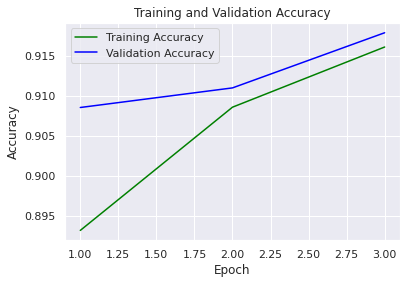

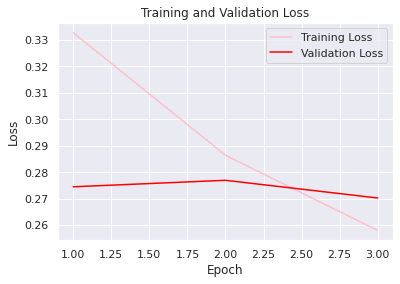

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Xception Model



**INITIALIZING THE BASE MODEL: Xception**

In [ ]:
from keras.applications.xception import Xception

In [ ]:
base_model=Xception(include_top=False, weights="imagenet", input_shape=(150,150,3))
base_model.trainable=False

83697664/83683744 [==============================] - 0s 0us/step


**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(4,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 4)                 204804    
Total params: 21,066,284
Trainable params: 204,804
Non-trainable params: 20,861,480
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=40, validation_steps=valid_num//batch_size)

Epoch 1/40
11/11 [==============================] - 153s 10s/step - loss: 4.3503 - accuracy: 0.3542 - val_loss: 3.1476 - val_accuracy: 0.3917
Epoch 2/40
11/11 [==============================] - 3s 309ms/step - loss: 2.5454 - accuracy: 0.4414 - val_loss: 1.3163 - val_accuracy: 0.5417
Epoch 3/40
11/11 [==============================] - 3s 303ms/step - loss: 1.7230 - accuracy: 0.5043 - val_loss: 1.5159 - val_accuracy: 0.4250
Epoch 4/40
11/11 [==============================] - 3s 308ms/step - loss: 1.6283 - accuracy: 0.5422 - val_loss: 1.3512 - val_accuracy: 0.5750
Epoch 5/40
11/11 [==============================] - 3s 307ms/step - loss: 1.2481 - accuracy: 0.6197 - val_loss: 0.8966 - val_accuracy: 0.6417
Epoch 6/40
11/11 [==============================] - 3s 305ms/step - loss: 1.3950 - accuracy: 0.5618 - val_loss: 1.1642 - val_accuracy: 0.7083
Epoch 7/40
11/11 [==============================] - 3s 301ms/step - loss: 1.3575 - accuracy: 0.5908 - val_loss: 1.6078 - val_accuracy: 0.5500
Epoch 

In [ ]:

import cv2
import numpy as np



img = cv2.imread('/content/drive/MyDrive/autistic/test/neutral/0008.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = classifier.predict(img)

print(classes)

[[0. 0. 0. 1.]]


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
#Saving our model
filepath="Mymodel.h5"
classifier.save(filepath)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

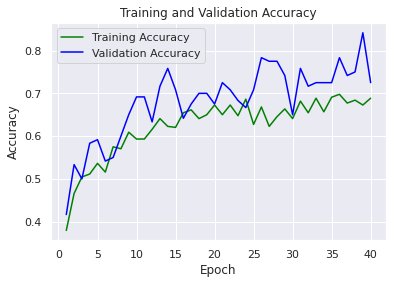

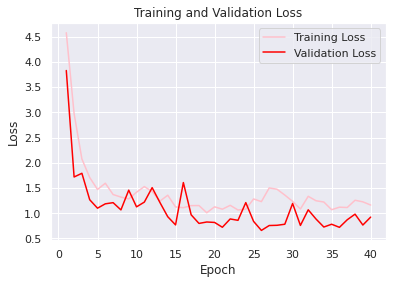

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# InceptionV3 Model

**INITIALIZING THE BASE MODEL: InceptionV3**

In [ ]:
from keras.applications import InceptionV3

ImportError: ignored

In [ ]:
base_model=InceptionV3(include_top=False, weights="imagenet", input_shape=(224,224,3))
base_model.trainable=False

87916544/87910968 [==============================] - 0s 0us/step


**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(39,activation='softmax'))
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 39)                1996839   
Total params: 23,799,623
Trainable params: 1,996,839
Non-trainable params: 21,802,784
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=3, validation_steps=valid_num//batch_size)

Epoch 1/3
346/346 [==============================] - 503s 1s/step - loss: 2.9268 - accuracy: 0.7390 - val_loss: 1.4422 - val_accuracy: 0.8249
Epoch 2/3
346/346 [==============================] - 506s 1s/step - loss: 1.4313 - accuracy: 0.8338 - val_loss: 1.2199 - val_accuracy: 0.8698
Epoch 3/3
346/346 [==============================] - 507s 1s/step - loss: 1.5036 - accuracy: 0.8553 - val_loss: 1.3818 - val_accuracy: 0.8749


In [ ]:
#Saving our model
filepath="Mymodel2.h5"
classifier.save(filepath)

**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

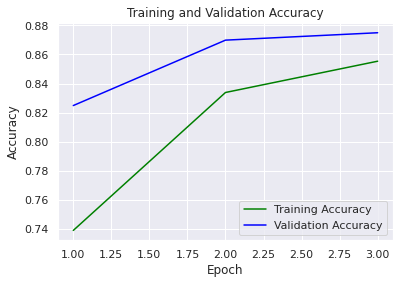

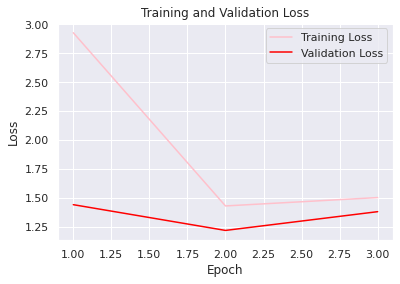

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# ResNet152 Model

**INITIALIZING THE BASE MODEL: ResNet152**

In [ ]:
from keras.applications import ResNet152

In [ ]:
base_model=ResNet152(include_top=False, weights="imagenet", input_shape=(224,224,3))
base_model.trainable=False

234700800/234698864 [==============================] - 4s 0us/step


**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(39,activation='softmax'))
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 7, 7, 2048)        58370944  
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 39)                3913767   
Total params: 62,284,711
Trainable params: 3,913,767
Non-trainable params: 58,370,944
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=3, validation_steps=valid_num//batch_size)

Epoch 1/3
346/346 [==============================] - 571s 2s/step - loss: 4.0544 - accuracy: 0.2379 - val_loss: 2.4718 - val_accuracy: 0.3916
Epoch 2/3
346/346 [==============================] - 575s 2s/step - loss: 2.7233 - accuracy: 0.3258 - val_loss: 2.4766 - val_accuracy: 0.3805
Epoch 3/3
346/346 [==============================] - 585s 2s/step - loss: 2.6487 - accuracy: 0.3654 - val_loss: 2.6794 - val_accuracy: 0.4221


In [ ]:
#Saving our model
filepath="Mymodel2.h5"
classifier.save(filepath)

**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

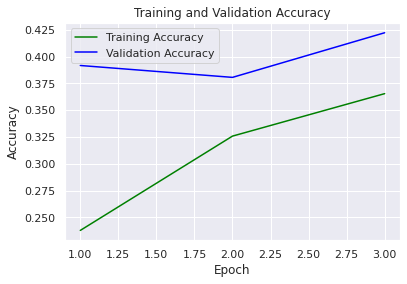

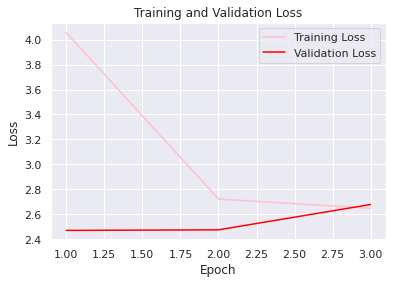

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# MoblieNetV2 Model

**INITIALIZING THE BASE MODEL: MobileNetV2**

In [ ]:
from keras.applications import MobileNetV2

In [ ]:
base_model=MobileNetV2(include_top=False, weights="imagenet", input_shape=(224,224,3))
base_model.trainable=False

9412608/9406464 [==============================] - 0s 0us/step


**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(39,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 39)                2446119   
Total params: 4,704,103
Trainable params: 2,446,119
Non-trainable params: 2,257,984
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=3, validation_steps=valid_num//batch_size)

Epoch 1/3
346/346 [==============================] - 522s 2s/step - loss: 2.1738 - accuracy: 0.8239 - val_loss: 1.1626 - val_accuracy: 0.8947
Epoch 2/3
346/346 [==============================] - 514s 1s/step - loss: 1.3340 - accuracy: 0.8984 - val_loss: 1.2385 - val_accuracy: 0.9092
Epoch 3/3
346/346 [==============================] - 506s 1s/step - loss: 1.2360 - accuracy: 0.9186 - val_loss: 1.1849 - val_accuracy: 0.9221


In [ ]:
#Saving our model
filepath="Mymodel2.h5"
classifier.save(filepath)

**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

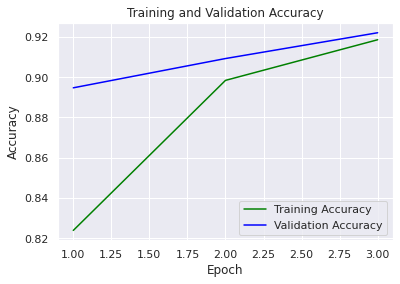

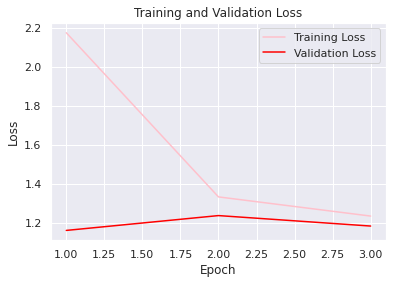

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()